# **Installing Packages**

In [1]:
!pip install pandas numpy scikit-learn
!pip install better_profanity

# **Importing Libraries**

In [2]:
import numpy
import sklearn
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import re
from nltk import stem
from nltk.corpus import stopwords

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# **Connecting Google Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Files' Location**

In [4]:
DATASET_FILE = "dataset_combined_2510_new.csv"
PREPROCESSED_INPUT_TRAINING_DATA = "preprocessed_input_data.csv"

# **Data Cleaning**

## Data Cleaning Tools

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Stemming

In [6]:
stemmer = stem.SnowballStemmer('english')
stopwords = set(stopwords.words('english'))

## Data Cleaning Functions

In [7]:
# Removing Special Characters and Numbers and URLs
def keep_alpha(msg):

    non_url = re.sub(r"http\S+", "", s)
    res = re.sub('[^a-zA-Z\s]', '', non_url)
    res1 = re.sub('\n', '', res)

    return res1

def nlp_preprocessing(msg):

    try:
        msg = msg.lower() # Converts messages to lowercase
        msg = [word for word in msg.split() if word not in stopwords] # Removes stopwords
        msg = " ".join([stemmer.stem(word) for word in msg]) # Using a stemmer (getting root form of each word of each row)
    except Exception as e:
        print(e)

    return msg

# **Data Preprocessing**

## Importing the main dataset

In [8]:
df = pd.read_csv(DATASET_FILE)
df.rename(columns = {'Text':'tweet'}, inplace = True)
df = df.dropna()
df = df.sample(frac=1).reset_index()

## NLP Preprocessing

In [9]:
df['tweet'] = df['tweet'].astype(str) # Data preprocessing using NLP : nltk
df['tweet'] = df['tweet'].str.strip() # Removes Leading and Ending Whitespaces
df['tweet'] = df['tweet'].apply(keep_alpha) # Keeps only Alphabets
df['tweet'] = df['tweet'].apply(nlp_preprocessing) # NLP preprocessing to remove stopwords and get base form of each word

In [10]:
print(df['depressed'].value_counts())

depressed
YES    23012
NO     14855
Name: count, dtype: int64


## Copying the Preprocessed data in another file

In [11]:
df.to_csv(PREPROCESSED_INPUT_TRAINING_DATA, index=False)

## Importing the Preprocessed Data

In [12]:
df = pd.read_csv(PREPROCESSED_INPUT_TRAINING_DATA)
df = df.dropna()

## Vectorization

In [13]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['tweet'].values)
y = df['depressed'].values

# **Splitting the dataset into the Training set and Test set**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Training**

## Training the Random Forest Regression on the Training set

In [15]:
def train_random_forest(X_train, X_test, y_train, y_test):
    from sklearn.ensemble import RandomForestClassifier

    model = RandomForestClassifier(n_estimators=100, random_state=42) # Creates Instance of Logistic Regression
    model.fit(X_train, y_train) # Trains on train set
    y_pred = model.predict(X_test) # Predicts on test set

    acc = round(accuracy_score(y_test, y_pred) * 100, 2)
    cm = confusion_matrix(y_test, y_pred)

    print("\n\n---- Random Forest Confusion Matrix ----")
    print(classification_report(y_test, y_pred))
    print("Confusion matrix :\n", cm)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title("Random Forest Confusion Matrix")
    plt.show()
    print("Accuracy Score:\t", acc)
    print("\n\n\n")

    return model, acc, cm

## Training the Logistic Regression model on the Training set

In [16]:
def train_logistic_regression(X_train, X_test, y_train, y_test):
    from sklearn.linear_model import LogisticRegression

    model = LogisticRegression() # Creates Instance of Logistic Regression
    model.fit(X_train, y_train) # Trains on train set
    y_pred = model.predict(X_test) # Predicts on test set

    acc = round(accuracy_score(y_test, y_pred) * 100, 2)
    cm = confusion_matrix(y_test, y_pred)

    print("\n\n---- Logistic Regression Confusion Matrix ----")
    print(classification_report(y_test, y_pred))
    print("Confusion matrix :\n", cm)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title("Logistic Regression Confusion Matrix")
    plt.show()
    print("Accuracy Score:\t", acc)
    print("\n\n\n")

    return model, acc, cm

## Training the Decision Tree Model on the Training set

In [17]:
def train_decision_tree(X_train, X_test, y_train, y_test):
    from sklearn.tree import DecisionTreeClassifier

    model = DecisionTreeClassifier() # Creates Instance of Decision Tree
    model.fit(X_train, y_train) # Trains on train set
    y_pred = model.predict(X_test) # Predicts on test set

    acc = round(accuracy_score(y_test, y_pred) * 100, 2)
    cm = confusion_matrix(y_test, y_pred)

    print("\n\n---- Decision Tree Confusion Matrix ----")
    print(classification_report(y_test, y_pred))
    print("Confusion matrix :\n", cm)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title("Decision Tree Confusion Matrix")
    plt.show()

    print("Accuracy Score:\t", acc)
    print("\n\n\n")

    return model, acc, cm

## Training the Support Vector Machine (SVM) Model on the Training set

In [18]:
def train_svm(X_train, X_test, y_train, y_test):

    from sklearn.svm import SVC

    model = SVC(C=1000) # Creates Instance of SVM
    model.fit(X_train, y_train) # Trains on train set
    y_pred = model.predict(X_test) # Predicts on test set

    acc = round(accuracy_score(y_test, y_pred) * 100, 2) # Accuracy Score
    cm = confusion_matrix(y_test, y_pred) # Confusion Matrix

    print("\n\n---- SVM Confusion Matrix ----")
    print(classification_report(y_test, y_pred))
    print("Confusion matrix :\n", cm)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title("SVM Confusion Matrix")
    plt.show()
    print("Accuracy Score:\t", acc)
    print("\n\n\n")

    return model, acc, cm

## Training, Evaluation and Plotting



---- Logistic Regression Confusion Matrix ----
              precision    recall  f1-score   support

          NO       0.88      0.89      0.88      2924
         YES       0.93      0.92      0.92      4439

    accuracy                           0.91      7363
   macro avg       0.90      0.90      0.90      7363
weighted avg       0.91      0.91      0.91      7363

Confusion matrix :
 [[2597  327]
 [ 366 4073]]


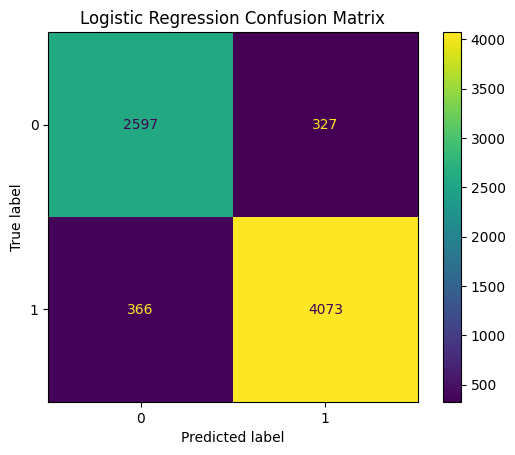

Accuracy Score:	 90.59






---- Decision Tree Confusion Matrix ----
              precision    recall  f1-score   support

          NO       0.85      0.87      0.86      2924
         YES       0.91      0.90      0.90      4439

    accuracy                           0.89      7363
   macro avg       0.88      0.88      0.88      7363
weighted avg       0.89      0.89      0.89      7363

Confusion matrix :
 [[2540  384]
 [ 462 3977]]


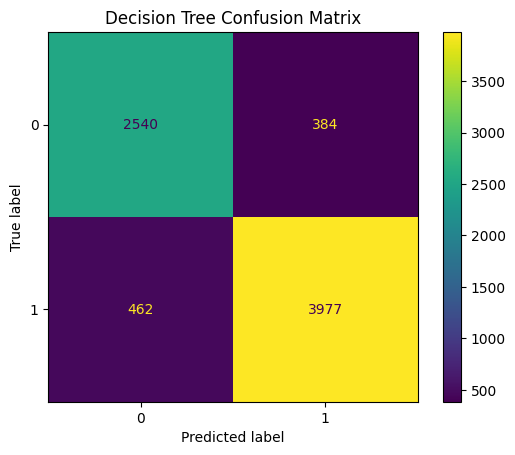

Accuracy Score:	 88.51






---- Random Forest Confusion Matrix ----
              precision    recall  f1-score   support

          NO       0.89      0.88      0.88      2924
         YES       0.92      0.93      0.92      4439

    accuracy                           0.91      7363
   macro avg       0.90      0.90      0.90      7363
weighted avg       0.91      0.91      0.91      7363

Confusion matrix :
 [[2562  362]
 [ 332 4107]]


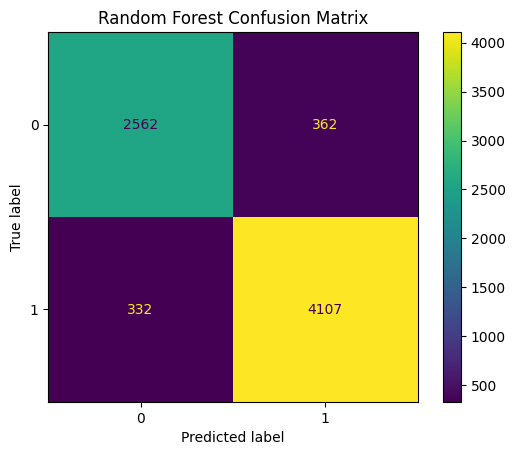

Accuracy Score:	 90.57






---- SVM Confusion Matrix ----
              precision    recall  f1-score   support

          NO       0.88      0.90      0.89      2924
         YES       0.94      0.92      0.93      4439

    accuracy                           0.91      7363
   macro avg       0.91      0.91      0.91      7363
weighted avg       0.91      0.91      0.91      7363

Confusion matrix :
 [[2642  282]
 [ 350 4089]]


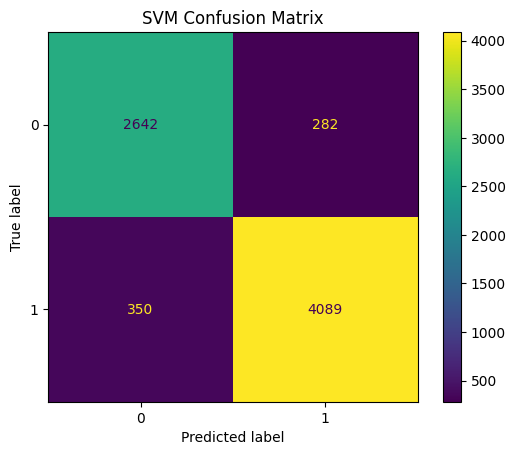

Accuracy Score:	 91.42






In [19]:
lr_model, lr_acc, lr_cm = train_logistic_regression(X_train, X_test, y_train, y_test)
dt_model, dt_acc, dt_cm = train_decision_tree(X_train, X_test, y_train, y_test)
rf_model, rf_acc, rf_cm = train_random_forest(X_train, X_test, y_train, y_test)
svm_model, svm_acc, svm_cm = train_svm(X_train, X_test, y_train, y_test)

# **Plotting accuracy**

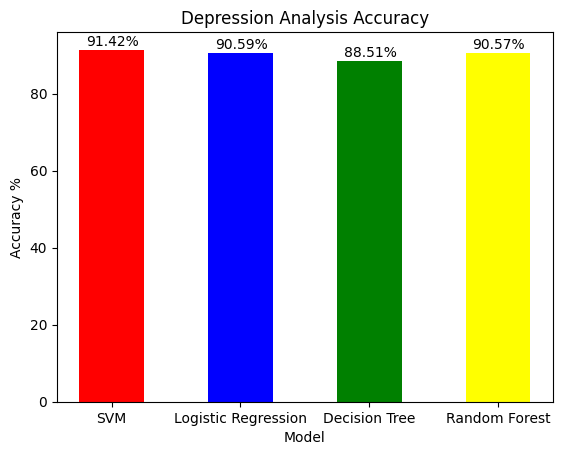

In [20]:
x = ['SVM', 'Logistic Regression', 'Decision Tree', 'Random Forest']
y = [svm_acc, lr_acc, dt_acc, rf_acc]
colors = ['red', 'blue', 'green', 'yellow']
bars = plt.bar(x, height=y, color=colors, width=0.5)

plt.xlabel('Model')
plt.ylabel('Accuracy %')
plt.title("Depression Analysis Accuracy")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.05, yval + 1, f"{yval}%")

plt.show()

# **Final Model Selection**

In [21]:
print("\n\nFinal Model Accuracy:", svm_acc)
print("\nConfusion Matrix:\n", svm_cm)



Final Model Accuracy: 91.42

Confusion Matrix:
 [[2642  282]
 [ 350 4089]]
